<a href="https://colab.research.google.com/github/salehghulamqasim/sales-prediction-model/blob/main/BigMart_Train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
'''
from google.colab import files
uploaded = files.upload()
'''

'\nfrom google.colab import files\n \nuploaded = files.upload()\n'

# Loading Packages and Data

In [135]:
#Importing libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pandas.plotting import scatter_matrix


In [114]:
train = pd.read_csv("/content/drive/My Drive/BigMart_dataset/Train.csv") 
test = pd.read_csv("/content/drive/My Drive/BigMart_dataset/Test.csv")

# Data Structure and Content

In [102]:
#printing first 5 rows of dataset just to see what is the dataset about
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [103]:
#checking summary of numerical columns 
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [99]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [104]:
print(train[["Item_Type","Item_Outlet_Sales"]])
#======

                  Item_Type  Item_Outlet_Sales
0                     Dairy          3735.1380
1               Soft Drinks           443.4228
2                      Meat          2097.2700
3     Fruits and Vegetables           732.3800
4                 Household           994.7052
...                     ...                ...
8518            Snack Foods          2778.3834
8519           Baking Goods           549.2850
8520     Health and Hygiene          1193.1136
8521            Snack Foods          1845.5976
8522            Soft Drinks           765.6700

[8523 rows x 2 columns]


In [161]:
print(test[["Item_Type","Outlet_Establishment_Year"]])
#======

               Item_Type  Outlet_Establishment_Year
0            Snack Foods                       1999
1                  Dairy                       2007
2                 Others                       1998
3            Snack Foods                       2007
4                  Dairy                       1985
...                  ...                        ...
5676         Snack Foods                       1997
5677       Starchy Foods                       2009
5678  Health and Hygiene                       2002
5679              Canned                       2007
5680              Canned                       2002

[5681 rows x 2 columns]


Sales per location

In [106]:
#number of rows and columns
train.shape

(8523, 12)

In [107]:
#checking unique values of all columns.
train.apply(lambda x: x.unique())


Item_Identifier              [FDA15, DRC01, FDN15, FDX07, NCD19, FDP36, FDO...
Item_Weight                  [9.3, 5.92, 17.5, 19.2, 8.93, 10.395, 13.65, n...
Item_Fat_Content                          [Low Fat, Regular, low fat, LF, reg]
Item_Visibility              [0.016047301, 0.019278216, 0.016760075, 0.0, 0...
Item_Type                    [Dairy, Soft Drinks, Meat, Fruits and Vegetabl...
Item_MRP                     [249.8092, 48.2692, 141.618, 182.095, 53.8614,...
Outlet_Identifier            [OUT049, OUT018, OUT010, OUT013, OUT027, OUT04...
Outlet_Establishment_Year    [1999, 2009, 1998, 1987, 1985, 2002, 2007, 199...
Outlet_Size                                         [Medium, nan, High, Small]
Outlet_Location_Type                                  [Tier 1, Tier 3, Tier 2]
Outlet_Type                  [Supermarket Type1, Supermarket Type2, Grocery...
Item_Outlet_Sales            [3735.138, 443.4228, 2097.27, 732.38, 994.7052...
dtype: object

In [ ]:
train.apply(lambda x: x.value_counts())

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0.0,NaN,NaN,NaN,526.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.003574698,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.003589104,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.003597678,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.003599378,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
Tier 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2388.0,NaN,NaN
Tier 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2785.0,NaN,NaN
Tier 3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3350.0,NaN,NaN
low fat,NaN,NaN,112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


we can see that we got 2410 null values in outlet size and 1463 in item_weight


### *Correlations* 


In [109]:
# find the correlation
myCor=train.corr()
myCor

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


Most strongest relationships are with Item outlet sales and Item_mrp

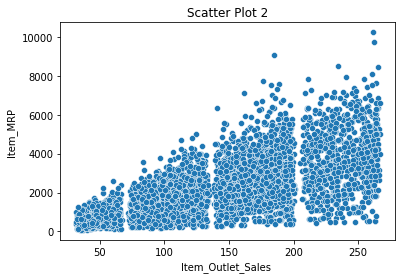

'\nMaximum Retail Price affects our product sales\n'

In [163]:
sns.scatterplot(x="Item_MRP", y="Item_Outlet_Sales", data=train)
plt.title("Scatter Plot 2")
plt.xlabel("Item_Outlet_Sales ")
plt.ylabel("Item_MRP ")
plt.show()

'''
Maximum Retail Price affects our product sales
'''


This graph tells us how Item_mrp influences Item_outlet_size

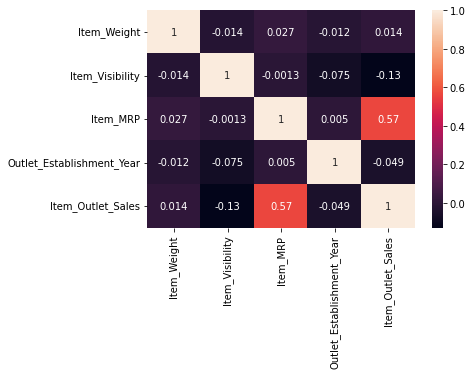

In [ ]:
sns.heatmap(train.corr(), annot=True)
plt.show()

#Data cleansing


In [115]:
#let us check nulls value for train set
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**as we can see we have Null values**

In [95]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4650 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            4650 non-null   object 
 1   Item_Weight                4650 non-null   float64
 2   Item_Fat_Content           4650 non-null   object 
 3   Item_Visibility            4650 non-null   float64
 4   Item_Type                  4650 non-null   object 
 5   Item_MRP                   4650 non-null   float64
 6   Outlet_Identifier          4650 non-null   object 
 7   Outlet_Establishment_Year  4650 non-null   int64  
 8   Outlet_Size                4650 non-null   object 
 9   Outlet_Location_Type       4650 non-null   object 
 10  Outlet_Type                4650 non-null   object 
 11  Item_Outlet_Sales          4650 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 472.3+ KB


i choose to drop the null values since we already have 8k+ rows

In [116]:
# drop missing values
train = train.dropna()


In [118]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

**But now since we dropped all of them. It shows zero null values ;)**

In [121]:
# Check for duplicates
duplicates = train.duplicated()
print(duplicates.sum())

0


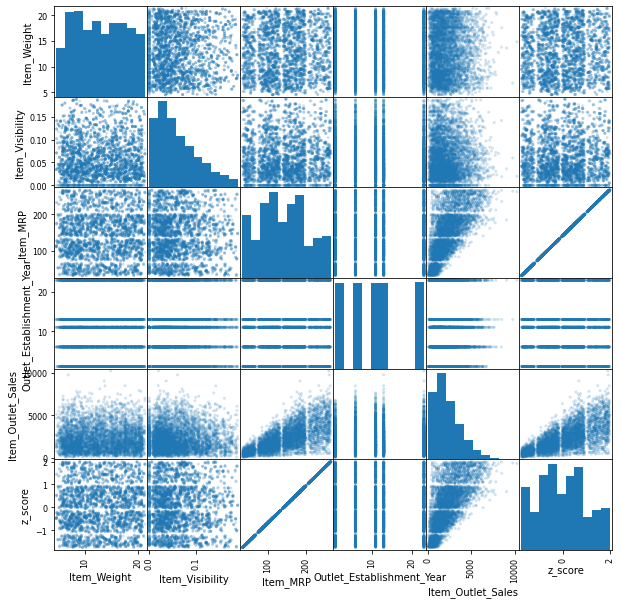

In [183]:
scatter_matrix(train, alpha=0.2, figsize=(10, 10), diagonal='hist')
plt.show()

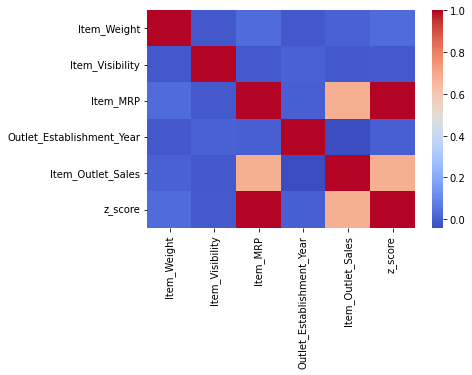

In [140]:
sns.heatmap(train.corr(), cmap='coolwarm')
plt.show()

#Exploratory Data Analysis
##Univariate

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


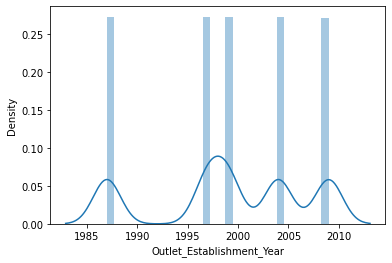

In [164]:
sns.distplot(train['Outlet_Establishment_Year'],bins=30)
#The distplot can give you a sense of the spread and shape of the data
#======

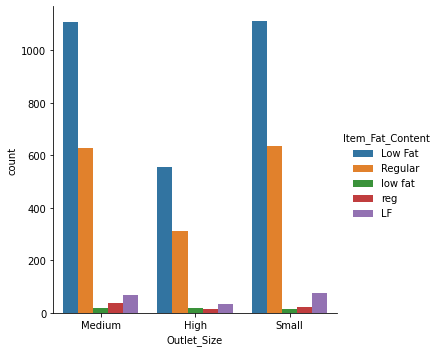

In [169]:
sns.catplot(x='Outlet_Size',hue='Item_Fat_Content',data=train,kind='count')
#====

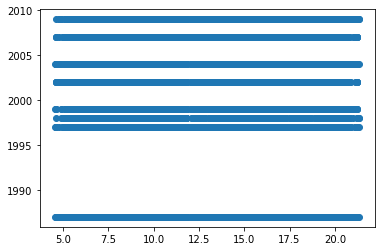

In [ ]:
plt.scatter(train.Item_Weight,train['Outlet_Establishment_Year'])
plt.show()

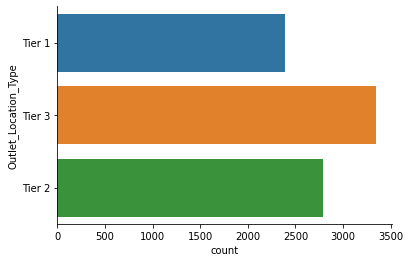

In [ ]:
sns.countplot(y="Outlet_Location_Type", data = train)
sns.despine()

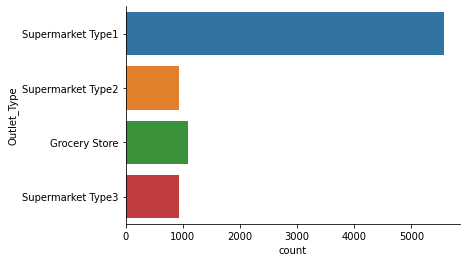

In [ ]:
sns.countplot(y="Outlet_Type", data = train)
sns.despine()

------

###Bivariate

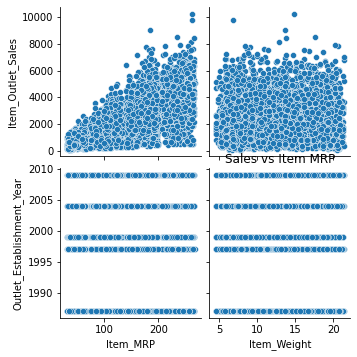

In [167]:
sns.pairplot(data=train, x_vars=["Item_MRP","Item_Weight"], y_vars=["Item_Outlet_Sales","Outlet_Establishment_Year"])
plt.title('Sales vs Item MRP')

plt.show()


*   products with a higher price (***Item_MRP***) would have a higher weight (***Item_Weight***) and that these two variables could be correlated.

*   Older stores that have been established for a longer time would have higher sales than newer stores.



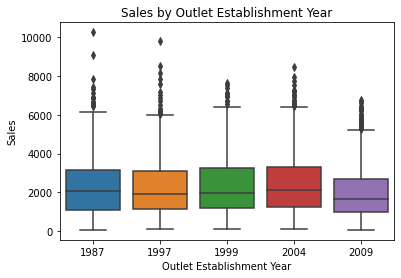

In [159]:
sns.boxplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', data=train)

# Adding a title and labels
plt.title('Sales by Outlet Establishment Year')
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Sales')

plt.show()

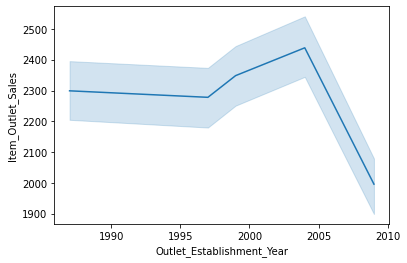

In [174]:
sns.lineplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', data=train)
plt.show()


* the decreasing trend in the line plot and box plot could suggest that fewer stores were opened in years after 2004 compared to earlier years.
 However, it's also possible that this trend is due to other factors such as store closures or changes in the way the data was collected. 

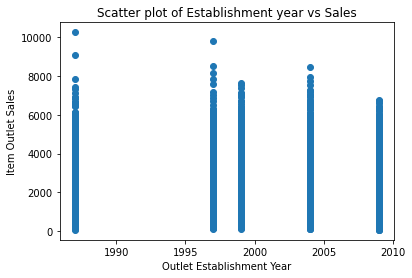

In [176]:
plt.scatter(train['Outlet_Establishment_Year'], train['Item_Outlet_Sales'])
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Item Outlet Sales')
plt.title('Scatter plot of Establishment year vs Sales')
plt.show()

* We dont have any lines in 1990 upto 1996 and from 2000 to 2003 and then from 2004 to 2009. This might mean no new stores were opened within these time periods or no reports were made to show in plot


##TO-DO
1.   Encoding Categorical Variables
2.   Label encoding
3.   One Hot Encoding
4.   PreProcessing Data
---
**Modeling**
1.  Linear Regression
2.  Regularized Linear Regression
3.  RandomForest
4.  XGBoost
